# Tutorial 3: Wind Farm Setup

In [1]:
# Load the modules
amrwindfedir = '../../'
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the case
case = amrwind.MyApp.init_nogui()

## Set some wind properties

In [3]:
WS   = 10
WDir = 225

case.setAMRWindInput('ABL_windspeed', WS,   forcechange=True)
case.setAMRWindInput('ABL_winddir',   WDir, forcechange=True)
case.ABL_calculateWindVector()

## Create turbines and domain

In [4]:
turbinescsv="""
# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
T0, 500, 300, GE25test, , ,
T1, 500, 700, GE25test, , ,
"""
domainsize=[1000,1000,1000]
backgrounddeltax=10
case.setAMRWindInput('turbines_csvtextbox', turbinescsv)
case.setAMRWindInput('turbines_domainsize', domainsize)
case.setAMRWindInput('turbines_backgroundmeshsize', backgrounddeltax)
case.setAMRWindInput('turbines_deleteprev', True)

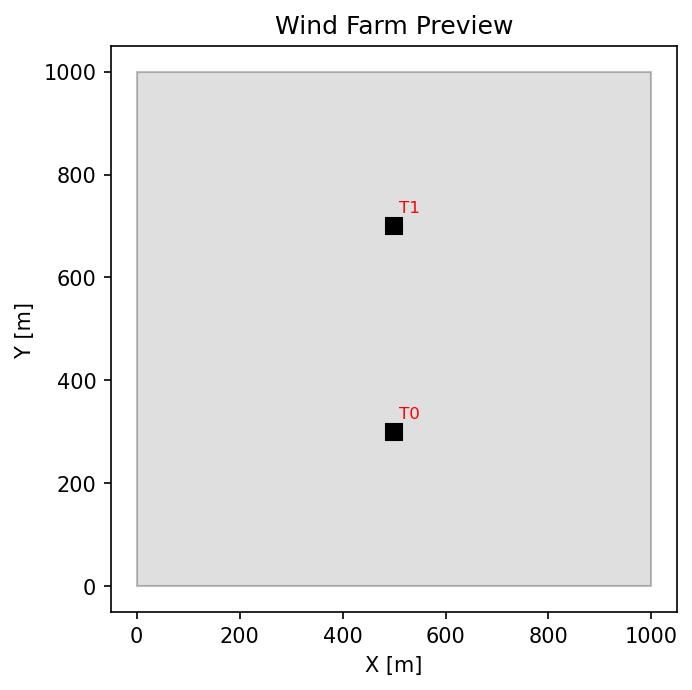

In [5]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.turbines_previewAllTurbines(ax=ax)

In [6]:
case.turbines_createAllTurbines()
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

['T0', 'T1']


## Set up the refinement zones

In [7]:
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
0,     1,    1,   1,   0.75, 1, opt1:1
1,     0.5,  0.5, 0.5, 0.75, 1, 
#center:farm
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [8]:
case.refine_createAllZones()
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxtagging'].getitemlist())

['T0_level_0_zone', 'T1_level_0_zone', 'T0_level_1_zone', 'T1_level_1_zone']


Plotting turbines


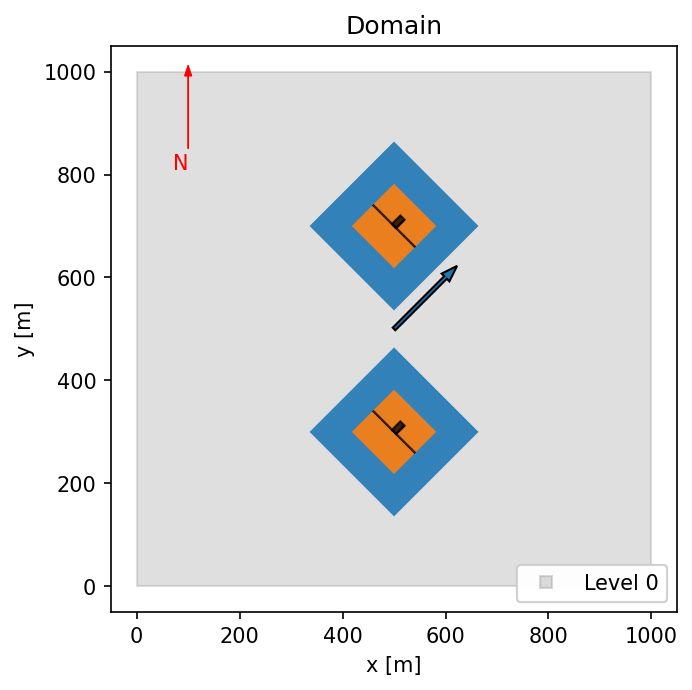

In [9]:
# Plot the domain
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.plotDomain(ax=ax)

## Set the sampling planes

In [10]:
samplingcsv="""
# CSV file should have columns withturbinescsv=
# name, type, upstream, downstream, lateral, below, above, n1, n2, options
name, type, upstream, downstream, lateral, below, above, n1, n2, options
cl1, centerline, 1,  0, none, none,  none,  11, 11, none
rp1, rotorplane, 2,  0, none, none,  none,  11, 11, none
#hh1, hubheight,  2,  1, 1, 0,  none,  11, 11, usedx:0.5
sw1, streamwise, 2,  1, 1, 0.5,  0.5,  11, 11, usedx:0.25 noffsets:1
hh,  hubheight,  2,  1, 1, 0,  none,  11, 11, usedx:0.25 center:farm orientation:x
"""
case.setAMRWindInput('sampling_csvtextbox', samplingcsv)
case.setAMRWindInput('sampling_deleteprev', True)

In [11]:
case.sampling_createAllProbes(verbose=False)
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxsampling'].getitemlist())

['T0_cl1', 'T1_cl1', 'T0_rp1', 'T1_rp1', 'T0_sw1', 'T1_sw1', 'Farm_hh']


Plotting turbines


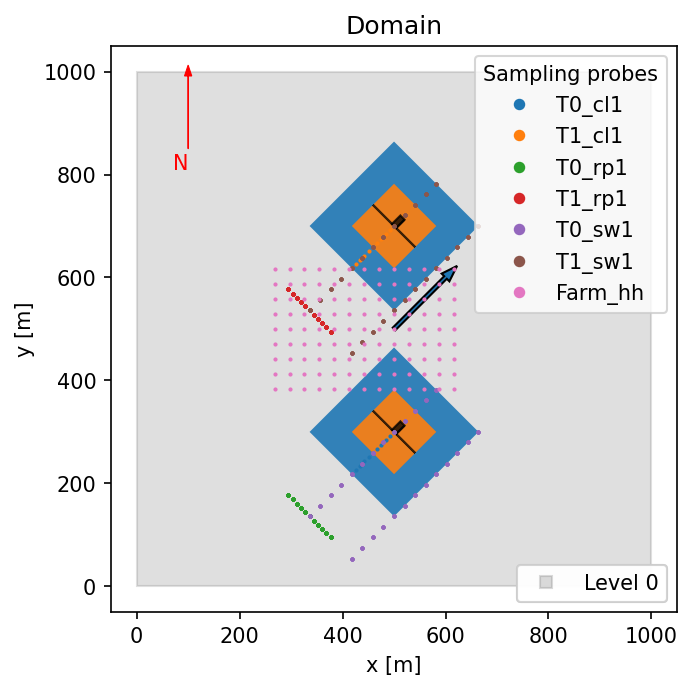

In [12]:
# Plot the domain
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist()
case.plotDomain(ax=ax)

## Set up a wind sweep

In [13]:
windspeeds=[10, 20]
winddirs=[270, 225]
caseprefix="Tutorial3_Case_{CASENUM}"
#dirprefix="Tutorial3_inputfiles"
usenewdirs=False

case.setAMRWindInput('sweep_windspeeds', ' '.join([repr(x) for x in windspeeds]))
case.setAMRWindInput('sweep_winddirs',   ' '.join([repr(x) for x in winddirs]))
case.setAMRWindInput('sweep_caseprefix', caseprefix)
case.setAMRWindInput('sweep_usenewdirs', usenewdirs)
#case.setAMRWindInput('sweep_dirprefix',  dirprefix)

In [14]:
# Set up the cases
case.sweep_SetupRunParamSweep()

[10.0, 20.0]
[270.0, 225.0]
0 10.000000 270.000000 Tutorial3_Case_0
1 10.000000 225.000000 Tutorial3_Case_1
2 20.000000 270.000000 Tutorial3_Case_2
3 20.000000 225.000000 Tutorial3_Case_3


In [15]:
import difflib
diff = difflib.ndiff(open(caseprefix.format(CASENUM=0)+'.inp').readlines(),open(caseprefix.format(CASENUM=1)+'.inp').readlines())
print(''.join(diff))

  # --- Simulation time control parameters ---
  time.stop_time                           = 100.0               # Max (simulated) time to evolve [s]
  time.max_step                            = -1                  
  time.fixed_dt                            = -1.0                # Fixed timestep size (in seconds). If negative, then time.cfl is used
  incflo.verbose                           = 0                   
  io.check_file                            = chk                 
  incflo.use_godunov                       = true                
  incflo.godunov_type                      = ppm                 
  incflo.gravity                           = 0.0 0.0 -9.81       # Gravitational acceleration vector (x,y,z) [m/s^2]
  incflo.density                           = 1.0                 # Fluid density [kg/m^3]
  transport.viscosity                      = 1.872e-05           # Fluid dynamic viscosity [kg/m-s]
  transport.laminar_prandtl                = 0.7                 # Laminar pra